<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [124]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [125]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("/Users/damien/Documents/institute_of_data/dat/mod2/housing.data", header=None, names=names, delim_whitespace=True)

In [126]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [127]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

<AxesSubplot:ylabel='Frequency'>

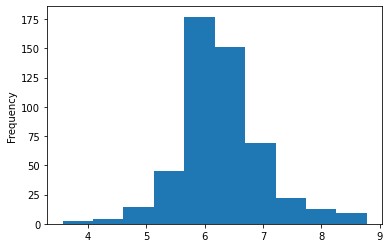

In [128]:
#ANSWER
data.RM.plot(kind='hist')

##### 2. Plot Histogram of `MEDV`

<AxesSubplot:ylabel='Frequency'>

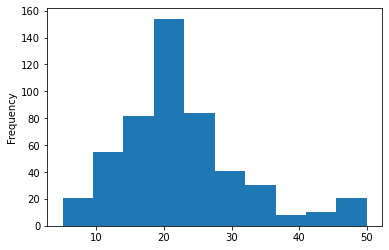

In [129]:
#ANSWER
data.MEDV.plot(kind='hist')

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

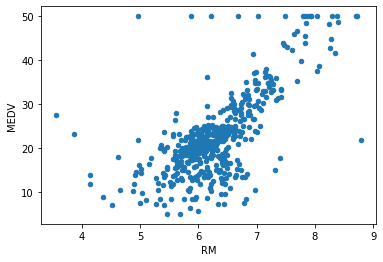

In [130]:
#ANSWER
data.plot(x='RM', y='MEDV', kind='scatter')

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

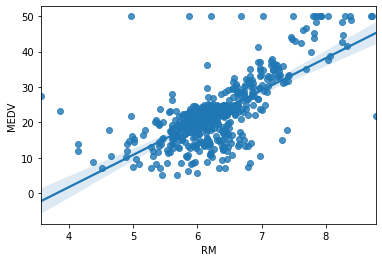

In [131]:
sns.regplot(x='RM', y='MEDV', data=data)

In [132]:
rm = data.RM
medv = data.MEDV
print('Pearsons correlation coefficient:', rm.corr(medv, method='pearson'))

Pearsons correlation coefficient: 0.6953599470715391


##### 3.B Is there any trend? State your observation.

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Subset A & B, based on domain knowledge
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases. What is our null and alternate hypothesis?
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [133]:
#ANSWER
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataste.

In [135]:
#ANSWER
large_houses = data[data['RM'] > 6]
small_houses = data[data['RM'] < 6]

large_house_sample = large_houses.sample(100, random_state=10)
small_house_sample = small_houses.sample(100, random_state=10)

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

<AxesSubplot:ylabel='Frequency'>

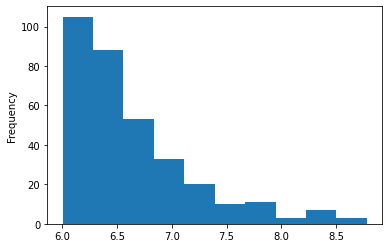

In [136]:
#ANSWER
large_houses.RM.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

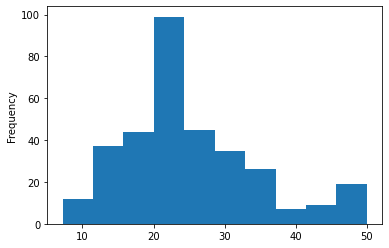

In [137]:
large_houses.MEDV.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

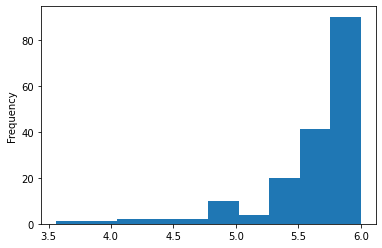

In [138]:
small_houses.RM.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

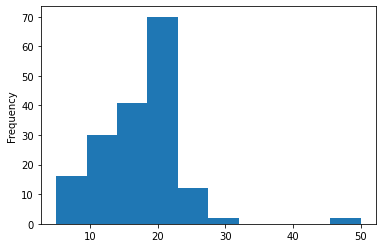

In [139]:
small_houses.MEDV.plot(kind='hist')

##### 7. Calculate Variance

Calculate variance for both samples.

In [140]:
#ANSWER
# Assuming we want variance of target?

var_large = np.var(large_house_sample.MEDV)
var_small = np.var(small_house_sample.MEDV)

##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [141]:
#ANSWER
sp = np.sqrt((var_large + var_small) / 2)

##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [142]:
#ANSWER
mean_large = np.mean(large_house_sample.MEDV)
mean_small = np.mean(small_house_sample.MEDV)

SE = sp * np.sqrt(2/200)

t = (mean_large - mean_small) / SE
t

10.741685981528354

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [143]:
#ANSWER
deg_freedom = len(large_house_sample) - 1
deg_freedom

99

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [144]:
#ANSWER

p_value = 1-cdf(t, df=deg_freedom)
p_value

0.0

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [145]:
#ANSWER
def reject_null(p_value, alpha):
    if p_value < alpha:
        print('Reject null hypothesis')
    else:
        print('Failed to reject null hypothesis')

In [146]:
#ANSWER
reject_null(p_value, alpha)

Reject null hypothesis


##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [147]:
#ANSWER

def t_test(mean1, mean2, n1, n2, var1, var2):
    
    """Calculate t and p value from two independent samples"""
    
    sp = np.sqrt((var1+var2) / 2)
    SE = sp * np.sqrt(2/(n1+n2))
    t = (mean1-mean2) / SE
    deg_freedom = (n1+n2) - 1
    p_value = 1-cdf(t, df=deg_freedom)
    
    return t, p_value

t_test(mean1=60, mean2=56, n1=100, n2=100, var1=50, var2=50)

(5.65685424949238, 2.6553456433653366e-08)

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [148]:
#ANSWER
stats.ttest_ind(large_house_sample, small_house_sample)

Ttest_indResult(statistic=array([-3.12243616,  4.56077149, -5.92467104, -0.64631379, -4.70552352,
       14.75097943, -4.63658784,  4.00472726, -1.67622022, -3.27516378,
       -3.54423086,  1.80523263, -8.06491036,  7.55744598]), pvalue=array([2.06227705e-03, 8.92119497e-06, 1.36623262e-08, 5.18824582e-01,
       4.74729565e-06, 1.03153297e-33, 6.42244303e-06, 8.77862219e-05,
       9.52733052e-02, 1.24658399e-03, 4.91237814e-04, 7.25574265e-02,
       6.87600619e-14, 1.49215697e-12]))



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



